# First analysis on real estate data

First step, importing the data and expore it.

In [57]:
import pandas as pd

df = pd.read_csv('original_dataset.csv', low_memory = False)

df.head()

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
0,6,8901695,4180,4180.0,True,MIXED_USE_BUILDING,295000,NaN,3,242,...,False,True,36,True,1000,1403,1403,0,False,GOOD
1,6,8747010,8730,8730.0,True,VILLA,675000,NaN,4,349,...,False,False,0,True,977,1526,1526,0,False,AS_NEW
2,6,8775843,4020,4020.0,True,APARTMENT_BLOCK,250000,NaN,5,303,...,False,False,0,False,0,760,760,0,False,TO_RENOVATE
3,6,8910441,1200,1200.0,True,HOUSE,545000,NaN,4,235,...,False,False,0,False,0,63,63,0,False,JUST_RENOVATED
4,6,8758672,1190,1190.0,True,MIXED_USE_BUILDING,500000,NaN,2,220,...,False,False,0,True,60,193,193,0,False,AS_NEW


In [58]:
df.tail()

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
93063,3,NaN,2650,2650.0,False,NaN,210000€,NaN,2,100 m²,...,False,NaN,NaN,False,NaN,NaN,NaN,2,0,To renovate
93064,3,NaN,3700,3700.0,False,NaN,239000€,NaN,1,78 m²,...,False,NaN,NaN,False,NaN,NaN,NaN,4,0,Good
93065,3,NaN,3800,3800.0,False,NaN,259000€,NaN,2,90 m²,...,False,NaN,NaN,False,NaN,NaN,NaN,2,0,As new
93066,3,NaN,2610,2610.0,False,NaN,254000€,NaN,2,88 m²,...,False,NaN,NaN,False,NaN,NaN,NaN,2,0,Not specified
93067,3,NaN,9840,9840.0,False,NaN,359000€,NaN,2,140 m²,...,False,NaN,NaN,False,NaN,NaN,NaN,4,0,Not specified


As a second step, I would like to have an overview of the unique values in a column.

In [59]:
counts = df.nunique()
counts

source                   6
hyperlink            46721
locality              5770
postcode              1029
house_is                 2
property_subtype       205
price                 7102
sale                    19
rooms_number            82
area                  3368
kitchen_has              2
furnished                2
open_fire                2
terrace                  6
terrace_area           185
garden                 145
garden_area            931
land_surface          2853
land_plot_surface     5890
facades_number          13
swimming_pool_has        5
building_state          17
dtype: int64

First observations : 
    - LOCALITY & POSTCODE
        Initially seemed identical besides their format, but there are way more localities than postcodes
    - SUBTYPES
        205 seems to be too much for a readable, consider reducing or adding a more generic category 
    - SALE
        NaN in head and tale
    - ROOMS_NUMBER
        82 different values, I expect about 4 to 10 max
    - TERRACE
        6 values, I see True, False, NaN, what is the rest?
    - GARDEN
        145 values, expected boolean
    - FACADES_NUMBER
        13 values, expected less
    - SWIMMING_POOL_HAS
        5 values, expected bolean
    - BUILDING_STATE
        17 values, can this be cleaned?
    

In [60]:
source = df['source'].unique()
source

array([6, 2, 7, 4, 1, 3], dtype=int64)

Later on it might be interesting to further investigate what source is supposed to mean. 


Right now I would like to see if I can manipulate the locality and postcode. 

In [61]:
df.dtypes

source                 int64
hyperlink             object
locality              object
postcode             float64
house_is                bool
property_subtype      object
price                 object
sale                  object
rooms_number          object
area                  object
kitchen_has           object
furnished             object
open_fire             object
terrace               object
terrace_area          object
garden                object
garden_area           object
land_surface          object
land_plot_surface     object
facades_number        object
swimming_pool_has     object
building_state        object
dtype: object

In [62]:
locality = df['locality'].unique()
locality

array(['4180', '8730', '4020', ..., '1517', '3234', '2288'], dtype=object)

I would like to convert the locality to an int.

In [63]:
import pandas as pd

df = pd.read_csv('original_dataset.csv', low_memory = False, dtype = {'locality': str, 'postcode': str, 'property_subtype': str})

df.head()

#type int is not working because  of a full adress present in the postcode

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
0,6,8901695,4180,4180,True,MIXED_USE_BUILDING,295000,NaN,3,242,...,False,True,36,True,1000,1403,1403,0,False,GOOD
1,6,8747010,8730,8730,True,VILLA,675000,NaN,4,349,...,False,False,0,True,977,1526,1526,0,False,AS_NEW
2,6,8775843,4020,4020,True,APARTMENT_BLOCK,250000,NaN,5,303,...,False,False,0,False,0,760,760,0,False,TO_RENOVATE
3,6,8910441,1200,1200,True,HOUSE,545000,NaN,4,235,...,False,False,0,False,0,63,63,0,False,JUST_RENOVATED
4,6,8758672,1190,1190,True,MIXED_USE_BUILDING,500000,NaN,2,220,...,False,False,0,True,60,193,193,0,False,AS_NEW


Using the astype() method I face the an issue if I have text items.

In [64]:
df['locality'] = df['locality'].astype('int')

ValueError: invalid literal for int() with base 10: 'Rue Rimière 105, 4120 Rotheux-Rimière, Neupré'

In [65]:
df['locality'] = pd.to_numeric(df['locality'], errors='coerce')
df['postcode'] = pd.to_numeric(df['postcode'], errors='coerce') 
df.dtypes

source                 int64
hyperlink             object
locality             float64
postcode             float64
house_is                bool
property_subtype      object
price                 object
sale                  object
rooms_number          object
area                  object
kitchen_has           object
furnished             object
open_fire             object
terrace               object
terrace_area          object
garden                object
garden_area           object
land_surface          object
land_plot_surface     object
facades_number        object
swimming_pool_has     object
building_state        object
dtype: object

This works to convert to float values, but int still gives a problem.

In [66]:
df['locality'] = df['locality'].astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [67]:
df['locality'] = pd.to_numeric(df['locality'], errors='coerce').astype('Int64')
df['postcode'] = pd.to_numeric(df['postcode'], errors='coerce').astype('Int64')
df.dtypes

#What exactly does coerce do, delete all lines with character values?

source                int64
hyperlink            object
locality              Int64
postcode              Int64
house_is               bool
property_subtype     object
price                object
sale                 object
rooms_number         object
area                 object
kitchen_has          object
furnished            object
open_fire            object
terrace              object
terrace_area         object
garden               object
garden_area          object
land_surface         object
land_plot_surface    object
facades_number       object
swimming_pool_has    object
building_state       object
dtype: object

Why is my property_subtype considered object where I have defined it as a string?

In [68]:
df.loc[df['postcode']!=df['locality']]

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
18034,2,https://www.realo.be/en/rue-rimiere-105-4120-r...,NaN,NaN,True,House,0,NaN,0,0,...,False,False,NaN,False,NaN,NaN,No,NaN,False,NaN
18035,2,https://www.realo.be/en/sint-truidensesteenweg...,NaN,NaN,True,House,340000€ 340.000,NaN,3,170m2,...,False,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18036,2,https://www.realo.be/en/augustijnenlaan-77-220...,NaN,NaN,False,Flat,259000€ 259.000,NaN,2,88m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18037,2,https://www.realo.be/en/averbodesesteenweg-19-...,NaN,NaN,True,House,449000€ 449.000,NaN,4,303m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18038,2,https://www.realo.be/en/edward-pynaertkaai-21-...,NaN,NaN,False,Flat,249900€ 249.900,NaN,3,102m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18039,2,https://www.realo.be/en/engelstraat-148-9040-s...,NaN,NaN,True,House,495000€ 495.000,NaN,3,244m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18040,2,https://www.realo.be/en/groenplein-33-9060-zel...,NaN,NaN,False,Flat,159000€ 159.000,NaN,2,244m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18041,2,https://www.realo.be/en/hoogveldstraat-21-3720...,NaN,NaN,False,Flat,219000€ 219.000,NaN,3,128m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18042,2,https://www.realo.be/en/eerste-meistraat-4-370...,NaN,NaN,False,Business,0,NaN,3,128m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18043,2,https://www.realo.be/en/roeselaarsestraat-84-8...,NaN,NaN,False,Flat,247000€ 247.000,NaN,2,125m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN


I noticed that most of the time if locality and postcode are not equal one of both is NaN. 

In [69]:
df["locality"].fillna(df["postcode"], inplace=True)
df.loc[df['postcode']!=df['locality']]

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
18034,2,https://www.realo.be/en/rue-rimiere-105-4120-r...,NaN,NaN,True,House,0,NaN,0,0,...,False,False,NaN,False,NaN,NaN,No,NaN,False,NaN
18035,2,https://www.realo.be/en/sint-truidensesteenweg...,NaN,NaN,True,House,340000€ 340.000,NaN,3,170m2,...,False,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18036,2,https://www.realo.be/en/augustijnenlaan-77-220...,NaN,NaN,False,Flat,259000€ 259.000,NaN,2,88m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18037,2,https://www.realo.be/en/averbodesesteenweg-19-...,NaN,NaN,True,House,449000€ 449.000,NaN,4,303m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18038,2,https://www.realo.be/en/edward-pynaertkaai-21-...,NaN,NaN,False,Flat,249900€ 249.900,NaN,3,102m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18039,2,https://www.realo.be/en/engelstraat-148-9040-s...,NaN,NaN,True,House,495000€ 495.000,NaN,3,244m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18040,2,https://www.realo.be/en/groenplein-33-9060-zel...,NaN,NaN,False,Flat,159000€ 159.000,NaN,2,244m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18041,2,https://www.realo.be/en/hoogveldstraat-21-3720...,NaN,NaN,False,Flat,219000€ 219.000,NaN,3,128m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18042,2,https://www.realo.be/en/eerste-meistraat-4-370...,NaN,NaN,False,Business,0,NaN,3,128m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN
18043,2,https://www.realo.be/en/roeselaarsestraat-84-8...,NaN,NaN,False,Flat,247000€ 247.000,NaN,2,125m2,...,True,False,NaN,True,NaN,NaN,Yes,NaN,False,NaN


I want to if I have remaining cases where the value is not NaN

In [70]:
df.loc[(pd.isnull(df['postcode'])==False) & (df['locality'].isnull())]
df.loc[(pd.isnull(df['locality'])==False) & (df['postcode'].isnull())]

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state


I would like to exclude cases where I have not geographical information as I think it's crucial for my analysis

In [71]:
df = df.loc[(pd.isnull(df['postcode'])==False) & (pd.isnull(df['locality'])==False)]
df

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
0,6,8901695,4180,4180,True,MIXED_USE_BUILDING,295000,NaN,3,242,...,False,True,36,True,1000,1403,1403,0,False,GOOD
1,6,8747010,8730,8730,True,VILLA,675000,NaN,4,349,...,False,False,0,True,977,1526,1526,0,False,AS_NEW
2,6,8775843,4020,4020,True,APARTMENT_BLOCK,250000,NaN,5,303,...,False,False,0,False,0,760,760,0,False,TO_RENOVATE
3,6,8910441,1200,1200,True,HOUSE,545000,NaN,4,235,...,False,False,0,False,0,63,63,0,False,JUST_RENOVATED
4,6,8758672,1190,1190,True,MIXED_USE_BUILDING,500000,NaN,2,220,...,False,False,0,True,60,193,193,0,False,AS_NEW
5,6,8940340,4040,4040,True,HOUSE,189000,NaN,3,200,...,False,False,0,True,40,100,11,0,False,TO_BE_DONE_UP
6,6,8923626,4540,4540,True,MIXED_USE_BUILDING,465000,NaN,4,400,...,False,False,0,False,0,312,312,0,False,GOOD
7,6,8913667,1150,1150,True,APARTMENT_BLOCK,650000,NaN,4,200,...,False,True,4,True,150,301,301,0,False,GOOD
8,6,8693767,6870,6870,True,MIXED_USE_BUILDING,89000,NaN,3,180,...,False,False,0,False,0,96,96,0,False,TO_RENOVATE
9,6,8325945,4030,4030,True,MIXED_USE_BUILDING,129000,NaN,3,156,...,False,False,0,False,0,71,71,0,False,TO_BE_DONE_UP


I would like to have less property subtypes.

In [72]:
subtype = df['property_subtype'].unique()
subtype

array(['MIXED_USE_BUILDING', 'VILLA', 'APARTMENT_BLOCK', 'HOUSE',
       'EXCEPTIONAL_PROPERTY', 'MANSION', 'TOWN_HOUSE', 'COUNTRY_COTTAGE',
       'MANOR_HOUSE', 'OTHER_PROPERTY', 'FARMHOUSE', 'CASTLE',
       'APARTMENT', 'BUNGALOW', 'CHALET', 'PENTHOUSE', 'SERVICE_FLAT',
       'LOFT', 'DUPLEX', 'FLAT_STUDIO', 'GROUND_FLOOR', 'TRIPLEX', 'KOT',
       'house', 'mansion', 'villa', 'exceptional-property',
       'apartment-block', 'town-house', 'apartment', 'penthouse',
       'ground-floor', 'loft', 'flat-studio', 'duplex', 'triplex',
       'mixed-use-building', 'farmhouse', 'bungalow', 'service-flat',
       'country-cottage', 'other-property', 'kot', 'manor-house',
       'chalet', 'castle', 'HOUSE_GROUP', 'APARTMENT_GROUP', 'House',
       'Town-house', 'Apartment', nan], dtype=object)

In [73]:
counts = df.nunique()
counts

source                   5
hyperlink            46264
locality              1029
postcode              1029
house_is                 2
property_subtype        51
price                 5835
sale                    11
rooms_number            81
area                  1746
kitchen_has              2
furnished                2
open_fire                2
terrace                  6
terrace_area           185
garden                 145
garden_area            931
land_surface          2853
land_plot_surface     4565
facades_number          13
swimming_pool_has        5
building_state          14
dtype: int64

In [74]:
df['property_subtype']=df['property_subtype'].str.upper()
df['property_subtype'] = df['property_subtype'].str.replace('-','_')

Let's see the impact of this step on the data.

In [75]:
counts = df.nunique()
counts

source                   5
hyperlink            46264
locality              1029
postcode              1029
house_is                 2
property_subtype        25
price                 5835
sale                    11
rooms_number            81
area                  1746
kitchen_has              2
furnished                2
open_fire                2
terrace                  6
terrace_area           185
garden                 145
garden_area            931
land_surface          2853
land_plot_surface     4565
facades_number          13
swimming_pool_has        5
building_state          14
dtype: int64

Reduction of the amount of subtypes to 35.

In [76]:
subtype = df['property_subtype'].unique()
subtype

array(['MIXED_USE_BUILDING', 'VILLA', 'APARTMENT_BLOCK', 'HOUSE',
       'EXCEPTIONAL_PROPERTY', 'MANSION', 'TOWN_HOUSE', 'COUNTRY_COTTAGE',
       'MANOR_HOUSE', 'OTHER_PROPERTY', 'FARMHOUSE', 'CASTLE',
       'APARTMENT', 'BUNGALOW', 'CHALET', 'PENTHOUSE', 'SERVICE_FLAT',
       'LOFT', 'DUPLEX', 'FLAT_STUDIO', 'GROUND_FLOOR', 'TRIPLEX', 'KOT',
       'HOUSE_GROUP', 'APARTMENT_GROUP', nan], dtype=object)

Text(0,0.5,'Frequency')

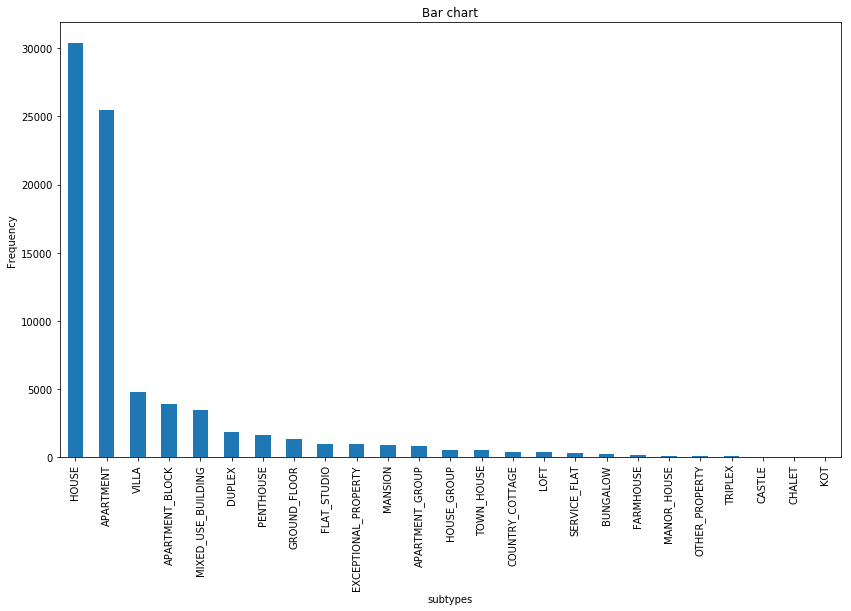

In [77]:
ax = df['property_subtype'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Bar chart")
ax.set_xlabel("subtypes")
ax.set_ylabel("Frequency")

#Does this plot filter the data when there is too much to display?
#Sometimes I get weird results, amongst which postcodes.

Next step lets see the number of rooms we have.

In [78]:
rooms_number = df['rooms_number'].unique()
rooms_number


array(['3', '4', '5', '2', '6', '7', '1', '8', '10', '41', '0', '11',
       '15', '44', '9', '12', '14', '19', '13', '24', '18', '34', '17',
       '16', '100', '49', '32', '71', '50', '20', '35', '99', '28', '25',
       '30', '65', '22', '23', '21', '26', '36', '70', '46', '90', '80',
       '40', '60', '204', 'None', nan, '6.0', '3.0', '5.0', '4.0', '2.0',
       '7.0', '8.0', '1.0', '11.0', '10.0', '41.0', '12.0', '0.0', '9.0',
       '15.0', '44.0', '13.0', '14.0', '18.0', '60.0', '20.0', '19.0',
       '22.0', '24.0', '25.0', '34.0', '17.0', '16.0', '100.0', '165.0',
       '49.0', 'Not specified'], dtype=object)

In [79]:
df['rooms_number'] = df['rooms_number'].str.replace('None','')
df['rooms_number'] = df['rooms_number'].str.replace('Not specified','')
df['rooms_number'] = df['rooms_number'].str.replace('nan','')

Let's see the impact of the correction.

In [80]:
rooms_number = df['rooms_number'].unique()
rooms_number

array(['3', '4', '5', '2', '6', '7', '1', '8', '10', '41', '0', '11',
       '15', '44', '9', '12', '14', '19', '13', '24', '18', '34', '17',
       '16', '100', '49', '32', '71', '50', '20', '35', '99', '28', '25',
       '30', '65', '22', '23', '21', '26', '36', '70', '46', '90', '80',
       '40', '60', '204', '', nan, '6.0', '3.0', '5.0', '4.0', '2.0',
       '7.0', '8.0', '1.0', '11.0', '10.0', '41.0', '12.0', '0.0', '9.0',
       '15.0', '44.0', '13.0', '14.0', '18.0', '60.0', '20.0', '19.0',
       '22.0', '24.0', '25.0', '34.0', '17.0', '16.0', '100.0', '165.0',
       '49.0'], dtype=object)

Let's convert to int.

In [81]:
df['rooms_number'] = pd.to_numeric(df['rooms_number'], errors='coerce').astype('Int64')

In [82]:
rooms_number = df['rooms_number'].unique()
rooms_number

<IntegerArray>
[  3,   4,   5,   2,   6,   7,   1,   8,  10,  41,   0,  11,  15,  44,   9,
  12,  14,  19,  13,  24,  18,  34,  17,  16, 100,  49,  32,  71,  50,  20,
  35,  99,  28,  25,  30,  65,  22,  23,  21,  26,  36,  70,  46,  90,  80,
  40,  60, 204, NaN, 165]
Length: 50, dtype: Int64

In [83]:
terrace = df['terrace'].unique()
terrace

array(['True', 'False', nan, 'TRUE', '2.0', '3.0', '4.0'], dtype=object)

In [84]:
df.loc[(df['terrace']=='2.0')|(df['terrace']=='3.0')|(df['terrace']=='4.0')]

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
64895,1,https://www.immoweb.be/en/classified/house/for...,1180,1180,True,HOUSE,2950000.0,residential_sale,5,600.0,...,False,2.0,TRUE,30.0,NaN,20000.0,20000.0,4.0,NaN,AS_NEW
65274,1,https://www.immoweb.be/en/classified/exception...,8000,8000,True,EXCEPTIONAL_PROPERTY,2399000.0,residential_sale,5,400.0,...,False,2.0,TRUE,100.0,NaN,100.0,334.0,4.0,FALSE,AS_NEW
65347,1,https://www.immoweb.be/en/classified/house/for...,1933,1933,True,HOUSE,549900.0,residential_sale,3,209.0,...,NaN,2.0,NaN,NaN,NaN,150.0,380.0,4.0,NaN,NaN
65535,1,https://www.immoweb.be/en/classified/house/for...,6240,6240,True,HOUSE,250000.0,residential_sale,3,175.0,...,NaN,2.0,NaN,NaN,NaN,NaN,1074.0,3.0,NaN,NaN
65605,1,https://www.immoweb.be/en/classified/villa/for...,9840,9840,True,VILLA,735000.0,residential_sale,5,612.0,...,NaN,2.0,NaN,NaN,NaN,NaN,1371.0,4.0,NaN,NaN
65611,1,https://www.immoweb.be/en/classified/mansion/f...,9220,9220,True,MANSION,999000.0,residential_sale,7,528.0,...,NaN,2.0,NaN,NaN,NaN,579.0,738.0,2.0,NaN,NaN
65711,1,https://www.immoweb.be/en/classified/villa/for...,1410,1410,True,VILLA,675000.0,residential_sale,5,234.0,...,False,2.0,TRUE,60.0,NaN,NaN,1425.0,4.0,NaN,NaN
65713,1,https://www.immoweb.be/en/classified/villa/for...,1500,1500,True,VILLA,790000.0,residential_sale,7,578.0,...,NaN,3.0,TRUE,20.0,NaN,2300.0,2657.0,4.0,NaN,NaN
65750,1,https://www.immoweb.be/en/classified/villa/for...,7180,7180,True,VILLA,285000.0,residential_sale,2,138.0,...,NaN,2.0,TRUE,12.0,NaN,300.0,419.0,4.0,TRUE,AS_NEW
66111,1,https://www.immoweb.be/en/classified/villa/for...,9500,9500,True,VILLA,590000.0,residential_sale,4,377.0,...,True,2.0,TRUE,54.0,NaN,1132.0,1781.0,4.0,NaN,AS_NEW


In [85]:
df['terrace'] = df['terrace'].str.replace('TRUE','True')

Set the numeric values to nan as I want to have a boolean  column.

In [90]:
import numpy as np
df.loc[df['terrace'] == '4.0','terrace'] = np.nan
df.loc[df['terrace'] == '3.0','terrace'] = np.nan
df.loc[df['terrace'] == '2.0','terrace'] = np.nan

In [91]:
terrace = df['terrace'].unique()
terrace

array(['True', 'False', nan], dtype=object)

In [93]:
df['terrace'] = df['terrace'].astype('bool')
df.dtypes

source                int64
hyperlink            object
locality              Int64
postcode              Int64
house_is               bool
property_subtype     object
price                object
sale                 object
rooms_number          Int64
area                 object
kitchen_has          object
furnished            object
open_fire            object
terrace                bool
terrace_area         object
garden               object
garden_area          object
land_surface         object
land_plot_surface    object
facades_number       object
swimming_pool_has    object
building_state       object
dtype: object

In [94]:
garden = df['garden'].unique()
garden

array(['True', 'False', '16.0', '36.0', nan, '3749.0', '15.0', '45.0',
       '31.0', '40.0', '25.0', '20.0', '120.0', '30.0', '60.0', '19.0',
       '7.0', '127.0', '28.0', '50.0', '23.0', '26.0', '6.0', '10.0',
       '70.0', '4.0', '100.0', '64.0', '12.0', '17.0', '24.0', '22.0',
       '94.0', '55.0', '21.0', '145.0', '47.0', '8.0', '5.0', '18.0',
       '80.0', '170.0', '13.0', '38.0', '9.0', '150.0', '27.0', '66.0',
       '125.0', '48.0', '85.0', '75.0', '37.0', '11.0', '35.0', '32.0',
       '41.0', '114.0', '1.0', '14.0', '44.0', '74.0', '53.0', '161.0',
       '300.0', '43.0', '29.0', '90.0', '142.0', '105.0', '61.0', '62.0',
       '96.0', '108.0', '157.0', '2.0', '54.0', '34.0', '180.0', '3.0',
       '450.0', '112.0', '280.0', '33.0', '200.0', '140.0', '65.0',
       '196.0', '56.0', '42.0', '51.0', '111.0', '86.0', '77.0', '110.0',
       '63.0', '39.0', '57.0', '88.0', '93.0', '141.0', '72.0', '68.0',
       '400.0', '159.0', '76.0', '95.0', '46.0', '122.0', '52.0', '89.

What are these numeric values?

In [98]:
df.loc[(df['garden']!='True')&(df['garden']!='False')]

,source,hyperlink,locality,postcode,house_is,property_subtype,price,sale,rooms_number,area,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
64873,1,https://www.immoweb.be/en/classified/house/for...,1150,1150,True,HOUSE,990000.0,residential_sale,6,485.0,...,False,True,TRUE,16.0,NaN,NaN,251.0,2.0,FALSE,AS_NEW
64874,1,https://www.immoweb.be/en/classified/house/for...,4180,4180,True,HOUSE,195000.0,residential_sale,3,242.0,...,False,True,TRUE,36.0,NaN,100.0,475.0,3.0,FALSE,NaN
64875,1,https://www.immoweb.be/en/classified/new-real-...,7500,7500,True,HOUSE_GROUP,NaN,group_sale,NaN,NaN,...,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64876,1,https://www.immoweb.be/en/classified/house/for...,4480,4480,True,HOUSE,245000.0,residential_sale,5,142.0,...,False,True,TRUE,3749.0,NaN,250.0,615.0,4.0,FALSE,NaN
64877,1,https://www.immoweb.be/en/classified/mixed-use...,4180,4180,True,MIXED_USE_BUILDING,295000.0,residential_sale,3,242.0,...,False,True,TRUE,36.0,NaN,1000.0,1403.0,3.0,FALSE,NaN
64878,1,https://www.immoweb.be/en/classified/house/for...,4570,4570,True,HOUSE,549000.0,residential_sale,5,365.0,...,False,True,TRUE,15.0,NaN,1850.0,25157.0,4.0,FALSE,NaN
64879,1,https://www.immoweb.be/en/classified/mansion/f...,1400,1400,True,MANSION,600000.0,residential_sale,4,330.0,...,NaN,True,TRUE,45.0,NaN,185.0,390.0,3.0,TRUE,NaN
64880,1,https://www.immoweb.be/en/classified/exception...,8000,8000,True,EXCEPTIONAL_PROPERTY,625000.0,residential_sale,2,184.0,...,False,True,NaN,NaN,NaN,50.0,134.0,2.0,FALSE,AS_NEW
64881,1,https://www.immoweb.be/en/classified/villa/for...,8730,8730,True,VILLA,675000.0,residential_sale,4,349.0,...,False,True,NaN,NaN,NaN,977.0,1526.0,4.0,FALSE,AS_NEW
64882,1,https://www.immoweb.be/en/classified/villa/for...,1410,1410,True,VILLA,750000.0,residential_sale,5,270.0,...,False,True,TRUE,31.0,NaN,450.0,1059.0,4.0,TRUE,NaN


I think I can reasonably consider the numeric values to be the area, however let's verify.

In [ ]:
facades = df['facades_number'].unique()
facades

In [ ]:
ax = df['building_state'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")